In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [84]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

C:\Users\HARSH\Anaconda3\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [85]:
data=pd.read_csv("Dealing_Data.csv")

In [86]:
data.head()

,Account Number,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,...,Average_of_used_pattern_of_last_three_month,Last_Month_Post_Limit,Average_of_Post_Limit_of_last_two_month,Average_of_Post_Limit_of_last_three_month,Last_MOnth_data_used,Average_of_data_used_of_last_two_month,Average_of_data_used_of_last_three_month,Churn,Time_period,Contract_Time_Remaining
0,M1,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5.0,...,671.666667,0.0,0.0,0.000000,109.1,109.725,87.750000,0,1243.0,3.0
1,M2,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7.0,...,614.763333,0.0,0.0,1.666667,103.5,87.200,90.933333,0,1219.0,3.0
2,M3,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,1.0,...,670.940000,0.0,0.0,0.000000,75.1,62.500,64.950000,0,1211.0,369.0
3,M4,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,6.0,...,670.176667,0.0,0.0,0.000000,56.6,56.650,57.333333,0,1250.0,3.0
4,M5,VALID,PRP,Open,MF,Western,RENTED,48.0,Full Year,4.0,...,431.060000,0.0,0.0,0.000000,1.4,2.550,5.866667,0,72.0,278.0


In [87]:
data.columns

Index(['Account Number', 'Address', 'Scheme', 'Staus', 'Gender', 'Region ',
       ' Sale of Equipment Status', 'Age', 'Equipment Warranty', 'Salary Slab',
       'Professional Info', 'Age of Home', 'Mode', 'Defaults',
       'Last_Month_Payment', 'Average_of_payment_of_last_two_month',
       'Average_of_payment_of_last_three_month', 'Last_Month_Default',
       'Average_of_default_of_last_two_month',
       'Average_of_default_of_last_three_month', 'Initial_Level_Tech',
       'Account', 'Payment_Settlement', 'Utilities',
       'Operational_Capabilities', 'Initial_Level_Payment_Settlement',
       'Limit_Defaults', 'Last_Month_used_pattern',
       'Average_of_used_pattern_of_last_two_month',
       'Average_of_used_pattern_of_last_three_month', 'Last_Month_Post_Limit',
       'Average_of_Post_Limit_of_last_two_month',
       'Average_of_Post_Limit_of_last_three_month', 'Last_MOnth_data_used',
       'Average_of_data_used_of_last_two_month',
       'Average_of_data_used_of_last_thre

In [88]:
data["X"]=data["Account Number"].apply(lambda x: x[0])
train=data[data.X=="M"]
test=data[data.X=="V"]
del data["X"], train["X"], test["X"]

data.shape, train.shape, test.shape

((14952, 39), (9966, 39), (4986, 39))

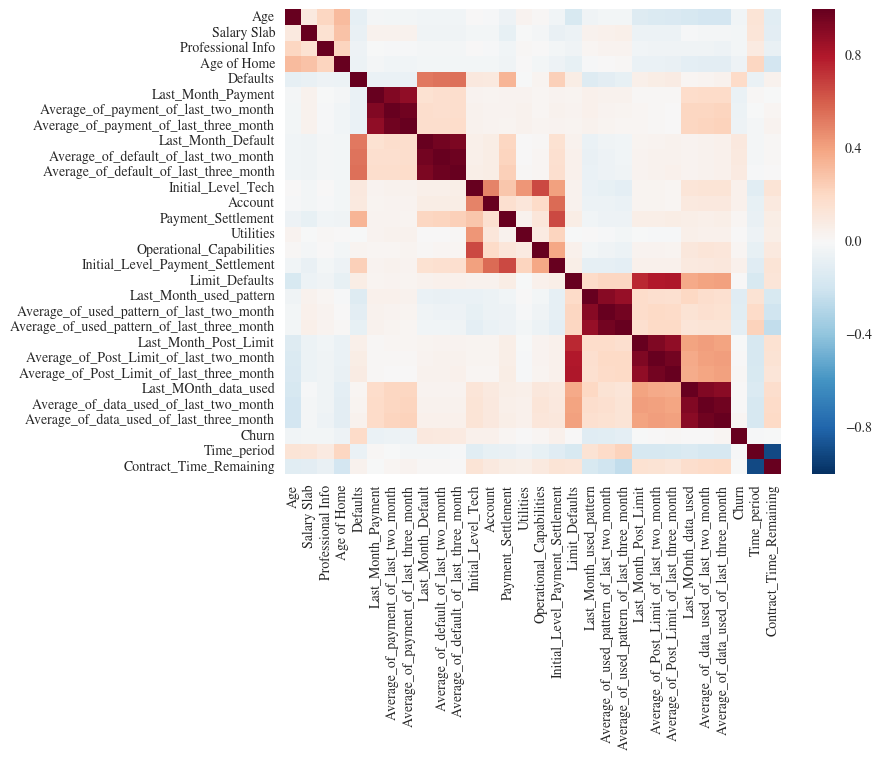

In [89]:
rcParams['figure.figsize'] = (8,6)
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [90]:
len(data.Scheme.unique())

15

> Dealing with categories of Scheme

In [91]:
print (data["Scheme"][data.Scheme=="PRS"].count())
print (train[train.Scheme=="PRS"]["Scheme"].count())
print (test[test.Scheme=="PRS"]["Scheme"].count())

77
0
77


In [92]:
print (data[data.Scheme=="PWP"]["Scheme"].count())
print (train[train.Scheme=="PWP"]["Scheme"].count())
print (test[test.Scheme=="PWp"]["Scheme"].count())

201
201
0


In [93]:
print (data[data.Scheme=="PRM"]["Scheme"].count())
print (train[train.Scheme=="PRM"]["Scheme"].count())
print (test[test.Scheme=="PRM"]["Scheme"].count())

1397
1397
0


In [94]:
len(data["Scheme"].unique())

15

In [95]:
data["Scheme"][data.Scheme=="PRS"]=-999

C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [96]:
data[data["Scheme"]==-999]["Scheme"].count()

77

In [97]:
x=data.groupby("Region ")["Scheme"].agg(lambda x:x.value_counts().index[0])

In [98]:
x

Region 
Eastern     PPL
Northern    PPL
Southern    PPL
Western     PPL
Name: Scheme, dtype: object

In [99]:
data["Scheme"][data["Scheme"]=="PPL"].count()

2993

In [100]:
data["Scheme"][data["Scheme"]==-999]="PPL"

C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [101]:
data["Scheme"][data["Scheme"]=="PPL"].count()

3070

In [102]:
a=train.groupby("Scheme")["Churn"].mean()
a.sort()
a

C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


Scheme
PWP    0.019900
PWM    0.023649
KLA    0.039256
PWR    0.043860
POP    0.045259
CHC    0.049096
CNN    0.051310
PPL    0.053994
PRM    0.054402
PRR    0.056561
PRP    0.060811
PMM    0.066667
MXX    0.090301
ESS    0.153153
Name: Churn, dtype: float64

In [103]:
data["Scheme"][data.Scheme=="PWP"]="PWM"

C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [104]:
data["Scheme"][data.Scheme=="PRM"]="PPL"

C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [105]:
len(data["Scheme"].unique())

12

> .

In [106]:
data["X"]=data["Account Number"].apply(lambda x: x[0])
train=data[data.X=="M"]
test=data[data.X=="V"]
del data["X"], train["X"], test["X"]

data.shape, train.shape, test.shape

((14952, 39), (9966, 39), (4986, 39))

In [107]:
print (data[data.Scheme=="PWP"]["Scheme"].count())
print (train[train.Scheme=="PWP"]["Scheme"].count())
print (test[test.Scheme=="PWp"]["Scheme"].count())

0
0
0


In [108]:
Categorical = ["Address","Scheme", "Staus", "Gender", "Region ", " Sale of Equipment Status", "Equipment Warranty",\
               "Salary Slab", "Professional Info", "Age of Home", "Mode"  ]

In [111]:
def replacing_categorical(X):
    x=train.groupby(X)["Churn"].mean()
    y=train.groupby(X)["Churn"].std()
    data[X+str("_mean")]= data[X].apply(lambda X1: x[X1])
    data[X+str("_std")] = data[X].apply(lambda X2: y[X2])
    del data[X]

In [112]:
for i in Categorical:
    replacing_categorical(i)

In [113]:
data.Address_mean.value_counts()

0.050461    14002
0.055380      950
Name: Address_mean, dtype: int64

In [114]:
data.head()

,Account Number,Age,Defaults,Last_Month_Payment,Average_of_payment_of_last_two_month,Average_of_payment_of_last_three_month,Last_Month_Default,Average_of_default_of_last_two_month,Average_of_default_of_last_three_month,Initial_Level_Tech,...,Equipment Warranty_mean,Equipment Warranty_std,Salary Slab_mean,Salary Slab_std,Professional Info_mean,Professional Info_std,Age of Home_mean,Age of Home_std,Mode_mean,Mode_std
0,M1,70.0,0.0,1209.810,1209.8100,1209.810,0.0,0.0,0.0,0.000000,...,0.050988,0.219983,0.041636,0.199829,0.057404,0.232629,0.044599,0.206472,0.053399,0.224841
1,M2,55.0,0.0,751.695,751.6950,751.695,0.0,0.0,0.0,3.000000,...,0.050988,0.219983,0.039683,0.195406,0.057404,0.232629,0.026396,0.160350,0.053399,0.224841
2,M3,64.0,0.0,1064.385,1064.3850,1064.385,0.0,0.0,0.0,0.000000,...,0.050988,0.219983,0.058559,0.235061,0.034483,0.182597,0.044599,0.206472,0.053399,0.224841
3,M4,66.0,0.0,1488.375,1581.5625,1375.500,0.0,0.0,0.0,0.000000,...,0.050988,0.219983,0.040296,0.196717,0.037671,0.190563,0.026396,0.160350,0.053399,0.224841
4,M5,48.0,0.0,856.695,888.1425,872.060,0.0,0.0,0.0,0.333333,...,0.000000,0.000000,0.062637,0.242347,0.057404,0.232629,0.063213,0.243400,0.053399,0.224841


In [121]:
data.columns

Index(['Account Number', 'Age', 'Defaults', 'Last_Month_Payment',
       'Average_of_payment_of_last_two_month',
       'Average_of_payment_of_last_three_month', 'Last_Month_Default',
       'Average_of_default_of_last_two_month',
       'Average_of_default_of_last_three_month', 'Initial_Level_Tech',
       'Account', 'Payment_Settlement', 'Utilities',
       'Operational_Capabilities', 'Initial_Level_Payment_Settlement',
       'Limit_Defaults', 'Last_Month_used_pattern',
       'Average_of_used_pattern_of_last_two_month',
       'Average_of_used_pattern_of_last_three_month', 'Last_Month_Post_Limit',
       'Average_of_Post_Limit_of_last_two_month',
       'Average_of_Post_Limit_of_last_three_month', 'Last_MOnth_data_used',
       'Average_of_data_used_of_last_two_month',
       'Average_of_data_used_of_last_three_month', 'Churn', 'Time_period',
       'Contract_Time_Remaining', 'Address_mean', 'Address_std', 'Scheme_mean',
       'Scheme_std', 'Staus_mean', 'Staus_std', 'Gender_mean'

In [122]:
del data["Professional Info_std"]

In [123]:
data.to_csv("Modified_Data.csv", index= False)

In [124]:
data.isnull().sum()

Account Number                                 0
Age                                            0
Defaults                                       0
Last_Month_Payment                             0
Average_of_payment_of_last_two_month           0
Average_of_payment_of_last_three_month         0
Last_Month_Default                             0
Average_of_default_of_last_two_month           0
Average_of_default_of_last_three_month         0
Initial_Level_Tech                             0
Account                                        0
Payment_Settlement                             0
Utilities                                      0
Operational_Capabilities                       0
Initial_Level_Payment_Settlement               0
Limit_Defaults                                 0
Last_Month_used_pattern                        0
Average_of_used_pattern_of_last_two_month      0
Average_of_used_pattern_of_last_three_month    0
Last_Month_Post_Limit                          0
Average_of_Post_Limi

In [125]:
#no